## **Bank Marketing Campaign:** <br> **Predicting Subscriptions for Term Deposits**

### **Contents**

1. Problem Statement
1. Libraries
1. Data Understanding
1. Exploratory Data Analysis
1. Preprocessing
1. Modeling / Analysis
1. Conclusion and Recommendation

****

### **1. Problem Statement**

**Context**

Bank XYZ is a European commercial bank that offers financial products to its customers. The recent financial crisis pressured European banks to increase regulatory capital in order to ensure that banks have enough liquid capital to be able to honor withdrawals whilst facing operating losses. Bank XYZ aims to increase their capital requirements by selling more long-term deposits.

A long-term deposit is a fixed-term investment, which involves the bank client storing money into a deposit account and not being able to withdraw from this account until the fixed term matures. In return, the bank client receives an interest that is usually of a better rate than a savings account.

Source:
https://www.investopedia.com/terms/t/termdeposit.asp

Currently, Bank XYZ is running telemarketing campaigns to sell long-term deposits. These telemarketing campaigns are operated remotely through call centers.


**Domain Understanding of Economic Indices**

<u> Employment Variation Rate (Quaterly Indicator)</u> is

<br>

<u> Consumer Price Index (Monthly Indicator)</u> is

<br>

<u> Consumer Confidence Index (Monthly Indicator)</u> is

<br>

<u> Euribor 3 Month Rate (Daily Indicator)</u> is the interbank lending rate

Source:
https://www.santander.com/en/stories/what-is-the-euribor-and-why-should-we-be-interested#:~:text=The%20top%20banks%20in%20the,%25%2C%20which%20gives%20the%20Euribor.

When the interest rate is higher, clients 

Source:
https://www.investopedia.com/terms/t/termdeposit.asp

**Problem Statement for Machine Learning**

The ML objective is to build a classification model that can classify the outcome of the marketing campaign accurately. In this ML development, the outcome is the target variable as follows:
<br>

Target: <br>
'yes' : The marketing campaign was successful. The client subscribed to term deposit with the bank. <br>
'no' : The marketing campaign was not successful. The client did not subscribe to term deposit with the bank.


**Problem Statement for Analytics**

Which clients have more potential to subscribe to long term deposits.

****

### **2. Libraries**

In [1]:
# Array and DataFrame
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

# Feature Engineering
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imbalanced Classification
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay, recall_score, f1_score

# Hide Warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Create variable to store random_state number
seed = 42

****

### **3. Data Understanding**

In [5]:
# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Attribute Information**

- There are 41118 rows and 21 columns.
- Each row of data represents multiple information attribute about a client.
- Each column represents an attribute containing information about that attribute for every client.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| age | quantitative | Age of client
| job | categorical | Type of job of client
| marital | categorical | Marital status of client
| education | categorical | Education level of client
| default | categorical | Whether the client has credit in default
| housing | categorical | Whether the client has housing loan
| loan | categorical | Whether the client has personal loan
| contact | categorical | Communication channel for contact with client
| month | categorical | Month for last contact with client
| day_of_week | categorical | Day of the week for last contact with client
| duration | quantitative | Duration, in seconds, of last contact with client
| campaign | quantitative | Number of times the client was contacted during this campaign, including last contact
| pdays | quantitative | Number of days since the client was last contacted during a previous campaign (999 means that the client was not contacted previously)
| previous | quantitative | Total number of times the client was contacted before this campaign
| poutcome | categorical | Outcome of the previous campaign
| emp.var.rate | quantitative | Employment variation rate (quaterly indicator)
| cons.price.idx | quantitative | Consumer price index (monthly indicator)
| cons.conf.idx | quantitative | Consumer confidence index (monthly indicator)
| euribor3m | quantitative | Euribor 3 month rate (daily indicator)
| nr.employed | quantitative | Number of employees (quaterly indicator)
| y | categorical | Target variable. 'yes': Client subscribed for term deposit. 'no': Client did not subscribe for term deposit.

| **Type** | **Sub-type** | **Variables / Features** |
| --- | --- | --- |
| Quantitative | Continuous | `age`, `duration`, `pdays`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m` |
| Quantitative | Discrete | `campaign`, `previous`, `nr.employed` |
| Categorical | Ordinal | `education` |
| Categorical | Nominal | `job`, `marital`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome` |
| Categorical | Target Variable - Binary | `y` |

In [19]:
quantitative_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
continuous_features = ['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
discrete_features = ['campaign', 'previous', 'nr.employed']

In [9]:
# Statistical summary
display(df.describe(), df.describe(include=object))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**Summary of Data Understanding**

- The 21 columns contain 1 target variable `y` and 20 other features.
- Out of the 20 features, there are 10 quantitative features and 11 categorical features as follows:

- The data can be grouped into client demographic data, data related to most recent contact during current campaign, historical data related to all prior communications with the client (previous campaigns) and macroeconomic indices data as follows:

| **Data Group** | **Features** | **Notes** |
| --- | --- | --- |
| Client demographic | `age`, `job`, `marital`, `education`, `default`, `housing`, `loan` | placeholder |
| Related to most recent contact during current campaign | `contact`, `month`, `day_of_week`, `duration`, `y` | placeholder |
| Historical / Prior communications including previous campaigns | `campaign`, `pdays`, `previous`, `poutcome` | placeholder  |
| Macroeconomic indices | `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed` | placeholder |

- 

****

### **4. Exploratory Data Analysis**
- Unique Values for Quantitative Data
- Distribution Plots for Quantitative Data and Outlier/Anomaly Identification
- Data Cardinalities of Categorical Features
- Distribution Plots of Categorical Features
- Proportion of Target Variable
- Data Correlation
- Identify Missing Values
- Identify Duplicates

**Unique Values for Quantitative Data**

In [31]:
# Unique values for quantitative features
list_unique_feature = []
for col in quantitative_features:
    list_unique_feature.append([col,
                                df[col].nunique(),
                                np.sort(df[col].unique())])

df_unique_feature = pd.DataFrame(columns=['Feature',
                                          'Number of Unique Values',
                                          'Unique Values'],
                                data=list_unique_feature)
display(df_unique_feature)

,Feature,Number of Unique Values,Unique Values
0,age,78,"[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]"
1,duration,1544,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
2,campaign,42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]"
3,pdays,27,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 999]"
4,previous,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
5,emp.var.rate,10,"[-3.4, -3.0, -2.9, -1.8, -1.7, -1.1, -0.2, -0.1, 1.1, 1.4]"
6,cons.price.idx,26,"[92.201, 92.379, 92.431, 92.469, 92.649, 92.713, 92.756, 92.843, 92.893, 92.963, 93.075, 93.2, 93.369, 93.444, 93.749, 93.798, 93.876, 93.918, 93.994, 94.027, 94.055, 94.199, 94.215, 94.465, 94.601, 94.767]"
7,cons.conf.idx,26,"[-50.8, -50.0, -49.5, -47.1, -46.2, -45.9, -42.7, -42.0, -41.8, -40.8, -40.4, -40.3, -40.0, -39.8, -38.3, -37.5, -36.4, -36.1, -34.8, -34.6, -33.6, -33.0, -31.4, -30.1, -29.8, -26.9]"
8,euribor3m,316,"[0.634, 0.635, 0.636, 0.637, 0.638, 0.639, 0.64, 0.642, 0.643, 0.644, 0.645, 0.646, 0.649, 0.65, 0.651, 0.652, 0.653, 0.654, 0.655, 0.659, 0.663, 0.668, 0.672, 0.677, 0.682, 0.683, 0.684, 0.685, 0.688, 0.69, 0.692, 0.695, 0.697, 0.699, 0.7, 0.701, 0.702, 0.704, 0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716, 0.717, 0.718, 0.719, 0.72, 0.721, 0.722, 0.723, 0.724, 0.727, 0.728, 0.729, 0.73, 0.731, 0.732, 0.733, 0.735, 0.737, 0.739, 0.74, 0.741, 0.742, 0.743, 0.744, 0.748, 0.749, 0.75, 0.752, 0.753, 0.754, 0.755, 0.761, 0.762, 0.766, 0.767, 0.768, 0.77, 0.771, 0.773, 0.778, 0.781, 0.782, 0.788, 0.79, 0.793, 0.797, 0.802, 0.803, 0.809, 0.81, 0.813, 0.819, ...]"
9,nr.employed,11,"[4963.6, 4991.6, 5008.7, 5017.5, 5023.5, 5076.2, 5099.1, 5176.3, 5191.0, 5195.8, 5228.1]"


- For `pdays`, 999 means that the client was not previously contacted. How to handle this value?
- Range of values of other features make sense.
- Next, distribution plots of quantitative features using boxplot and histograms will be used to detect outliers and explore the data further.

**Distribution Plots of Quantitative Data and Outlier/Anomaly Identification**

Outlier Analysis of age:



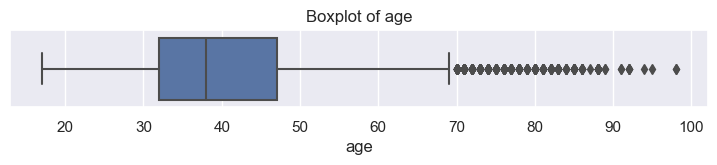

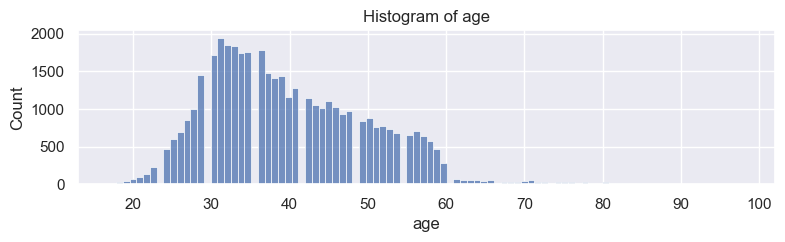

The mode of age is 31.
31    1947
32    1846
33    1833
Name: age, dtype: int64
The mean of age is 40.02406040594348.
The median of age is 38.0.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of duration:



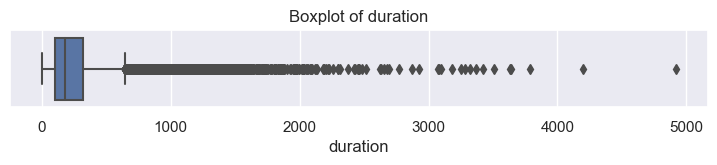

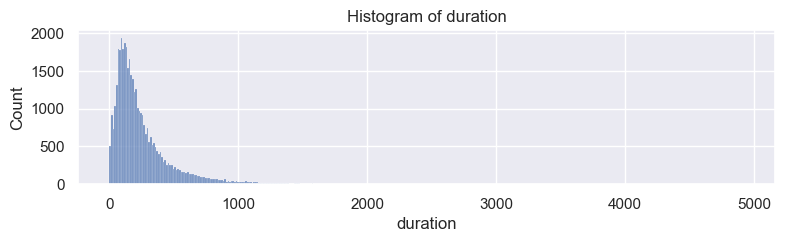

The mode of duration is 85.
90     170
85     170
136    168
Name: duration, dtype: int64
The mean of duration is 258.2850101971448.
The median of duration is 180.0.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of campaign:



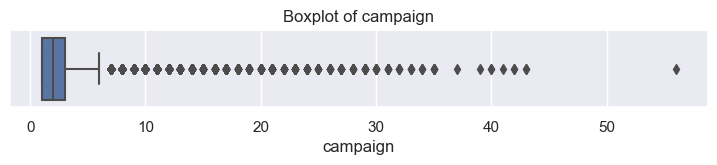

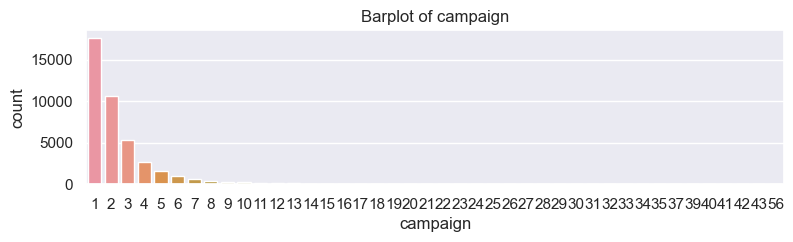

The mode of campaign is 1.
1    17642
2    10570
3     5341
Name: campaign, dtype: int64
The mean of campaign is 2.567592502670681.
The median of campaign is 2.0.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of pdays:



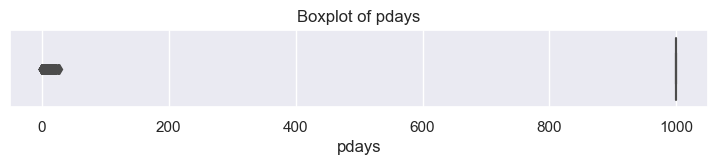

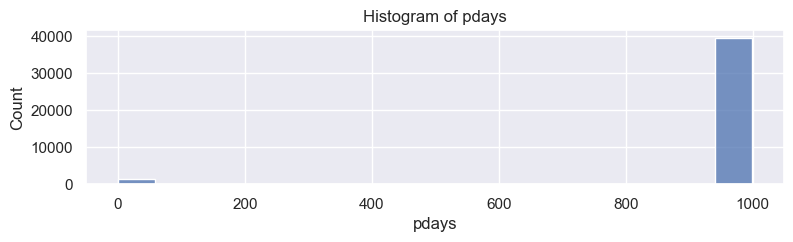

The mode of pdays is 999.
999    39673
3        439
6        412
Name: pdays, dtype: int64
The mean of pdays is 962.4754540157328.
The median of pdays is 999.0.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of previous:



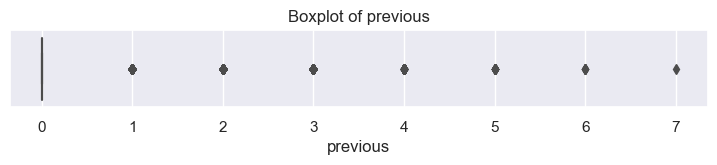

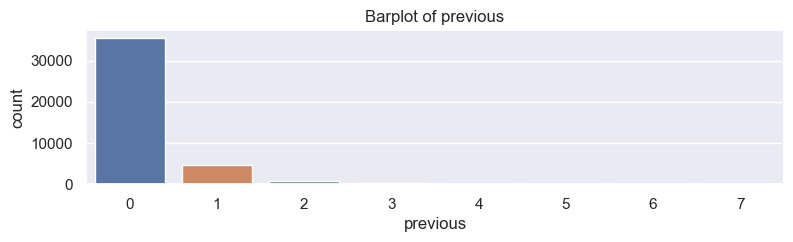

The mode of previous is 0.
0    35563
1     4561
2      754
Name: previous, dtype: int64
The mean of previous is 0.17296299893172767.
The median of previous is 0.0.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of emp.var.rate:



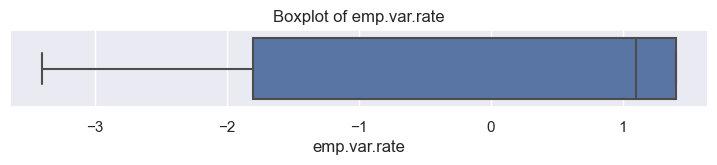

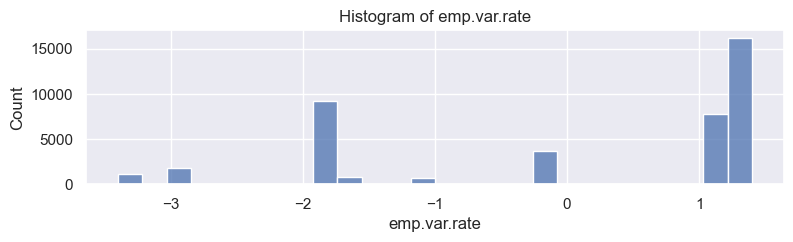

The mode of emp.var.rate is 1.4.
 1.4    16234
-1.8     9184
 1.1     7763
Name: emp.var.rate, dtype: int64
The mean of emp.var.rate is 0.0818855006319146.
The median of emp.var.rate is 1.1.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of cons.price.idx:



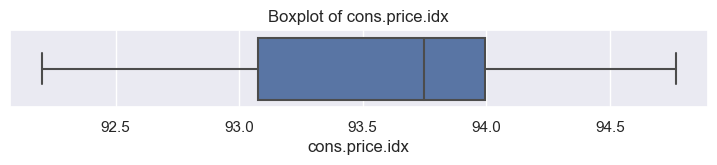

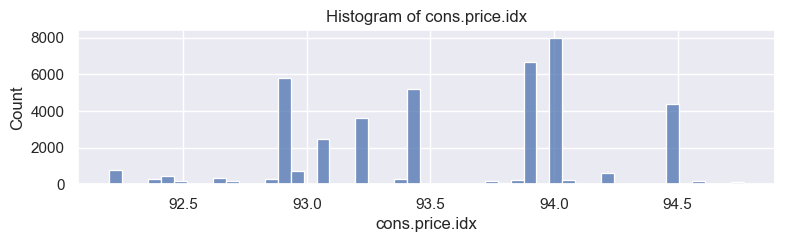

The mode of cons.price.idx is 93.994.
93.994    7763
93.918    6685
92.893    5794
Name: cons.price.idx, dtype: int64
The mean of cons.price.idx is 93.57566436831263.
The median of cons.price.idx is 93.749.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of cons.conf.idx:



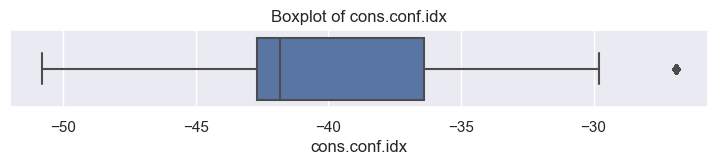

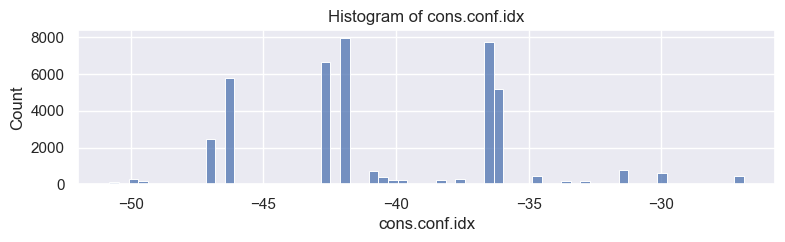

The mode of cons.conf.idx is -36.4.
-36.4    7763
-42.7    6685
-46.2    5794
Name: cons.conf.idx, dtype: int64
The mean of cons.conf.idx is -40.50260027191399.
The median of cons.conf.idx is -41.8.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of euribor3m:



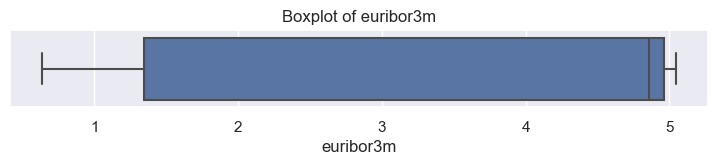

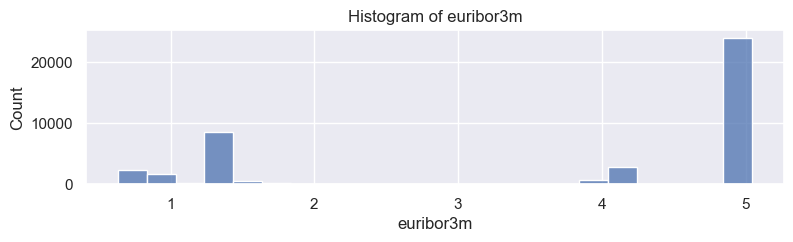

The mode of euribor3m is 4.857.
4.857    2868
4.962    2613
4.963    2487
Name: euribor3m, dtype: int64
The mean of euribor3m is 3.621290812858068.
The median of euribor3m is 4.857.
--------------------------------------------------------------------------------------------------- 

Outlier Analysis of nr.employed:



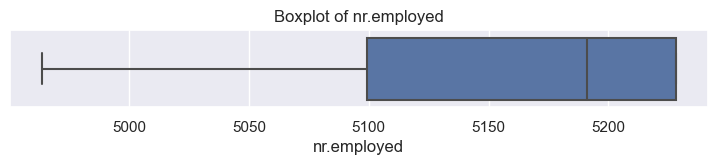

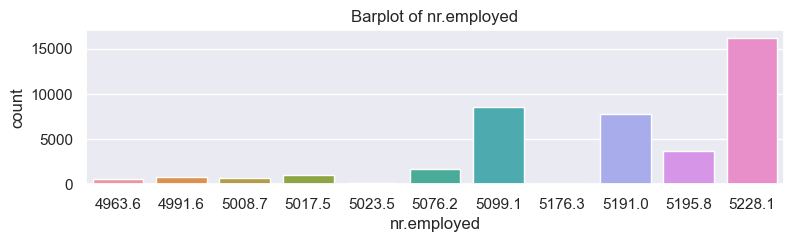

The mode of nr.employed is 5228.1.
5228.1    16234
5099.1     8534
5191.0     7763
Name: nr.employed, dtype: int64
The mean of nr.employed is 5167.035910941844.
The median of nr.employed is 5191.0.
--------------------------------------------------------------------------------------------------- 



In [21]:
# Distribution of Quantitative Features
for col in quantitative_features:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    else:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.countplot(data=df, x=df[col])
        plt.title(f'Barplot of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

**Summary of Data Distribution Plot and Outlier Identification**
- bin age?
- `duration`, `campaign` and `cons.conf.idx` have outliers that need to be cleaned.
- 


**Data Cardinalities of Categorical Features**

In [17]:
# Unique values for categorical features
list_unique_feature = []
for col in categorical_features:
    list_unique_feature.append([col,
                                df[col].nunique(),
                                np.sort(df[col].unique())])

df_unique_feature = pd.DataFrame(columns=['Feature',
                                          'Number of Unique Values',
                                          'Unique Values'],
                                data=list_unique_feature)
display(df_unique_feature)

,Feature,Number of Unique Values,Unique Values
0,job,12,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]"
1,marital,4,"[divorced, married, single, unknown]"
2,education,8,"[basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown]"
3,default,3,"[no, unknown, yes]"
4,housing,3,"[no, unknown, yes]"
5,loan,3,"[no, unknown, yes]"
6,contact,2,"[cellular, telephone]"
7,month,10,"[apr, aug, dec, jul, jun, mar, may, nov, oct, sep]"
8,day_of_week,5,"[fri, mon, thu, tue, wed]"
9,poutcome,3,"[failure, nonexistent, success]"


**Summary of Data Cardinality**
- Most of the categorical features have low cardinalities, except for `job`, `education` and `month`, which have a high cardinality of >= 8 column values.

Other information gained from table above:
- Calls are made only during weekdays.
- There are no last contact calls in January and February.
- There are only 2 channels of communication - via cellular and via telephone (landline).

<AxesSubplot:xlabel='y', ylabel='count'>

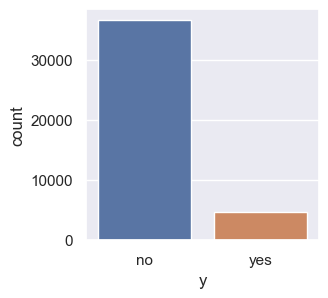

In [7]:
# Proportion of target variable to check for imbalance
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='y')

The proportion of target variable is imbalanced - there are more 'yes' values than 'no' values.

Hence, imbalanced classification techniques should be explored for modeling.

**Data Correlation**

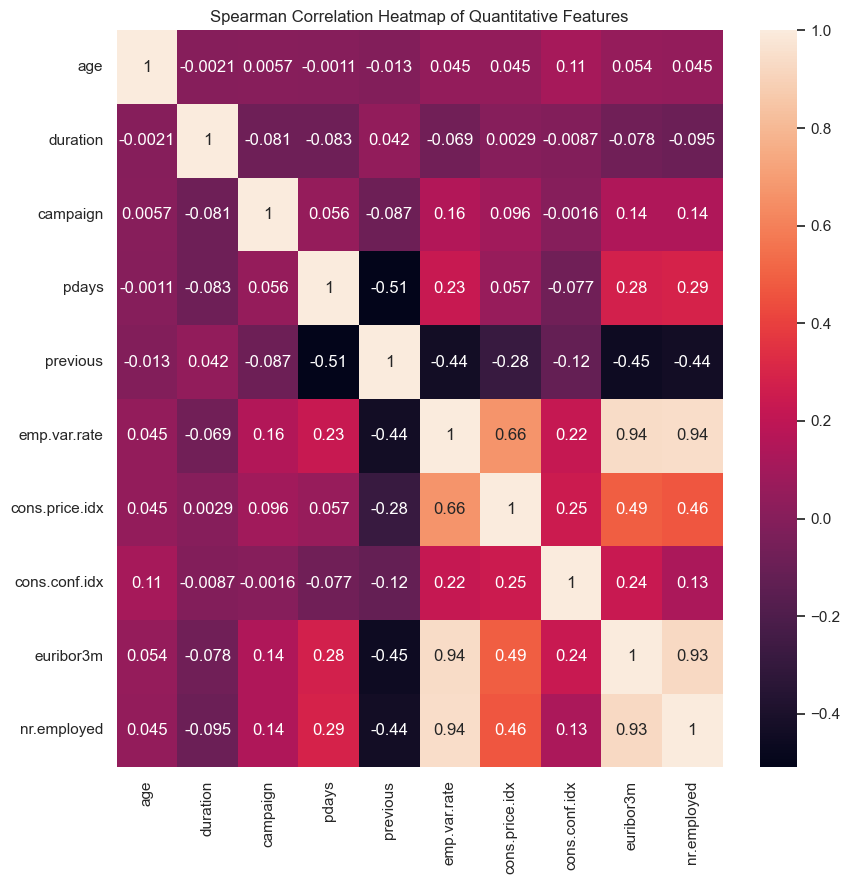

In [27]:
# Correlation between features
plt.figure(figsize=(9,9))
sns.heatmap(df[quantitative_features].corr(method='spearman'), annot=True)
plt.title('Spearman Correlation Heatmap of Quantitative Features')
plt.tight_layout()

**Identify Missing Values**

- From the table above, it can be observed that missing values are present in the form of string column values:
    - 'unknown' in `job`, `marital`, `education`, `default`, `housing`, `loan`
    - 'nonexistent' in `poutcome`

Next, the following code will check for the presence of NaN in the data.

In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Hence, only the columns with 'unknown' or 'nonexistent' have to be cleaned in the `Data Cleaning` Section later.

**Identify Duplicates**

In [11]:
df.duplicated().sum()

12

In [24]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


****

### **5. Preprocessing**

In [22]:
# Make a copy of the dataframe before preprocessing
dfc = df.copy()

**Cleaning Duplicates**

In [ ]:
dfc.drop_duplicates(inplace=True)

In [34]:
dfc.duplicated().sum()

12

**Cleaning Outliers**

**Cleaning Missing Values**

**Renaming Column Values in Target Variable**

In [ ]:
np.where()

**Distribution of Clean Data**
- Now that data cleaning is complete, the distribution of the new data can be analyzed before further preprocessing.

**Feature Selection**

**Feature Engineering**

****

### **6. Modeling / Analysis**

****

### **7. Conclusion and Recommendation**

**Conclusion**
- placeholder

**Recommendation**
- placeholder

****

### **8. Saving Model**

In [ ]:
# Import Pickle

In [ ]:
# Saving model using Pickle